In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("insurance.csv")
print(df)


      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


<Axes: >

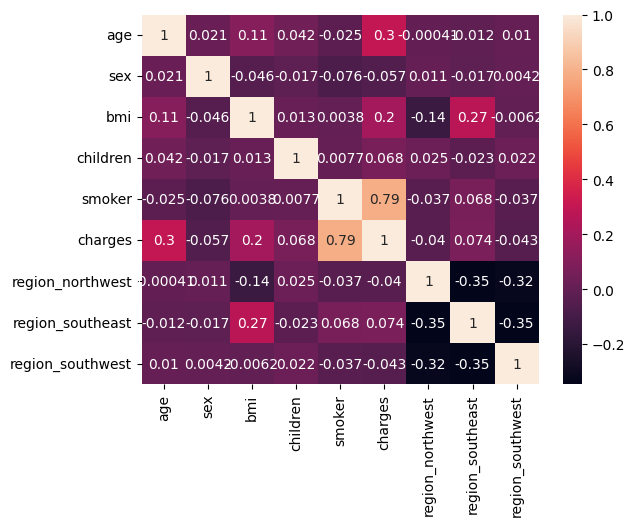

In [3]:
import seaborn as sns

# Check for missing values
print(df.isnull().sum())

# Encode categorical variables
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df = pd.get_dummies(df, columns=['region'], drop_first=True)

# Correlation heatmap
sns.heatmap(df.corr(), annot=True)


In [4]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Load your dataset
df = pd.read_csv("insurance.csv")

# Preprocessing (if not already done)
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df = pd.get_dummies(df, columns=['region'], drop_first=True)

# Features and target
X = df.drop('charges', axis=1)
y = df['charges']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.model_selection import train_test_split

# Assuming your full dataset is in X and y
# Example: X = df.drop('target', axis=1), y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

# Load your dataset into X and y
# Example:
# X = df.drop('target_column_name', axis=1)
# y = df['target_column_name']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R² Score: 0.8666060896739511
MAE: 2529.056051002803


In [7]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


RMSE: 4550.740090012444


In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))



R² Score: 0.8666060896739511
MAE: 2529.056051002803
RMSE: 4550.740090012444


In [11]:
# Example: Predict for a new person
# age, sex, bmi, children, smoker, region_northwest, region_southeast, region_southwest
sample_input = [[28, 0, 26.2, 2, 0, 0, 1, 0]]  # e.g., male, non-smoker, southeast region
predicted_cost = model.predict(sample_input)

print(f"Predicted Medical Cost: ₹{predicted_cost[0]:,.2f}")


Predicted Medical Cost: ₹4,854.77


C:\Users\Welcome\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Model upgrade with XGBoost

In [12]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
X = df.drop(columns=['medical_cost'])
y = df['medical_cost']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


ModuleNotFoundError: No module named 'xgboost'